In [1]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression
import seaborn as sns
import matplotlib.pyplot as plt
from datetime import datetime

In [2]:
pay = pd.read_csv('olist_order_payments_dataset.csv')
po  = pd.read_csv('olist_order_items_dataset.csv')
o   = pd.read_csv('olist_orders_dataset.csv')

#mesclar tabelas
df = pd.merge(pay, po, on =['order_id'])

df = pd.merge(df, o, on = ['order_id'])

In [3]:
#Filtro para limitar entre janeiro/2017 e agosto/2018
dfilter = df.loc[(df['order_approved_at'] >= '2017-01-01') &
       (df['order_approved_at'] <= '2018-08-01')]

dfilter.head()

,order_id,payment_sequential,payment_type,payment_installments,payment_value,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
0,b81ef226f3fe1789b1e8b2acac839d17,1,credit_card,8,99.33,1,af74cc53dcffc8384b29e7abfa41902b,213b25e6f54661939f11710a6fddb871,2018-05-02 22:15:09,79.80,19.53,0a8556ac6be836b46b3e89920d59291c,delivered,2018-04-25 22:01:49,2018-04-25 22:15:09,2018-05-02 15:20:00,2018-05-09 17:36:51,2018-05-22 00:00:00
1,a9810da82917af2d9aefd1278f1dcfa0,1,credit_card,1,24.39,1,a630cc320a8c872f9de830cf121661a3,eaf6d55068dea77334e8477d3878d89e,2018-07-02 11:18:58,17.00,7.39,f2c7fc58a9de810828715166c672f10a,delivered,2018-06-26 11:01:38,2018-06-26 11:18:58,2018-06-28 14:18:00,2018-06-29 20:32:09,2018-07-16 00:00:00
2,25e8ea4e93396b6fa0d3dd708e76c1bd,1,credit_card,1,65.71,1,2028bf1b01cafb2d2b1901fca4083222,cc419e0650a3c5ba77189a1882b7556a,2017-12-26 09:52:34,56.99,8.72,25b14b69de0b6e184ae6fe2755e478f9,delivered,2017-12-12 11:19:55,2017-12-14 09:52:34,2017-12-15 20:13:22,2017-12-18 17:24:41,2018-01-04 00:00:00
3,ba78997921bbcdc1373bb41e913ab953,1,credit_card,8,107.78,1,548e5bfe28edceab6b51fa707cc9556f,da8622b14eb17ae2831f4ac5b9dab84a,2017-12-12 12:13:20,89.90,17.88,7a5d8efaaa1081f800628c30d2b0728f,delivered,2017-12-06 12:04:06,2017-12-06 12:13:20,2017-12-07 20:28:28,2017-12-21 01:35:51,2018-01-04 00:00:00
4,42fdf880ba16b47b59251dd489d4441a,1,credit_card,2,128.45,1,386486367c1f9d4f587a8864ccb6902b,cca3071e3e9bb7d12640c9fbe2301306,2018-05-31 16:14:41,113.57,14.88,15fd6fb8f8312dbb4674e4518d6fa3b3,delivered,2018-05-21 13:59:17,2018-05-21 16:14:41,2018-05-22 11:46:00,2018-06-01 21:44:53,2018-06-13 00:00:00


# Gerando uma amostra de 70%

In [4]:
p = int((dfilter['order_id'].count())*0.7)

dfamostra = dfilter.sample(p)

dfamostra.describe()

,payment_sequential,payment_installments,payment_value,order_item_id,price,freight_value
count,76680.000000,76680.000000,76680.000000,76680.000000,76680.000000,76680.000000
mean,1.095801,2.946179,173.283540,1.198422,120.534075,19.971247
std,0.730143,2.782628,275.881907,0.698595,182.854385,15.649946
min,1.000000,0.000000,0.000000,1.000000,0.850000,0.000000
25%,1.000000,1.000000,61.010000,1.000000,39.900000,13.080000
50%,1.000000,2.000000,108.810000,1.000000,74.990000,16.230000
75%,1.000000,4.000000,190.307500,1.000000,134.990000,21.150000
max,26.000000,24.000000,13664.080000,20.000000,6735.000000,409.680000


# Probabilidade de cada método de pagamento

In [5]:
#pgts[['payment_type','count']] = dfamostra[['payment_type']].value_counts().reset_index()

pgts = dfamostra[['payment_type']].value_counts().reset_index()

pgts = pgts.rename(columns={0: "count"})

print('Probabilidade de cada método de pagamento:') 
#pgts = pgts[['payment_type','count']]

pgts['percent'] = pgts['count']/pgts['count'].sum()


pgts[['payment_type','percent']]


Probabilidade de cada método de pagamento:


,payment_type,percent
0,credit_card,0.737924
1,boleto,0.194718
2,voucher,0.054838
3,debit_card,0.012520


# Probabilidade de cada método de pagamento

In [6]:
boleto_percent = int(pgts['percent'].loc[pgts['payment_type'] == 'boleto'].sum()*100)

print(f'A probabilidade do pagamento ser realizado via boleto é de {boleto_percent}%.')

A probabilidade do pagamento ser realizado via boleto é de 19%.


# Correlação entre preço produto e preço frete

In [7]:
#correlação entre preço produto e preço frete

x_prod = np.array(dfamostra['price']) 
y_frei = np.array(dfamostra['freight_value'])

corr = np.corrcoef(x_prod, y_frei)

cor = pd.DataFrame(corr, columns = ['product_price','freight_value'])


print(f'A correlação de preço de produto e preço do frete é de {int(corr[0,1]*100)}%')

A correlação de preço de produto e preço do frete é de 41%


Gráfico com a correlação de preço de produto e preço do frete:


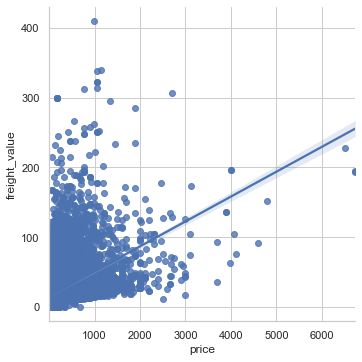

In [8]:
print('Gráfico com a correlação de preço de produto e preço do frete:')

sns.set_theme(style="whitegrid")
sns.lmplot(
    data=dfamostra, x= 'price', y= 'freight_value')

In [9]:
#preparando base de meses
dfpred = dfamostra[['order_approved_at','price','freight_value']]
dfpred['order_approved_at'] =  pd.to_datetime(dfpred['order_approved_at']).dt.to_period('m')
dfpred = dfpred.groupby('order_approved_at').sum()
dfpred

<ipython-input-9-f20a6f820845>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfpred['order_approved_at'] =  pd.to_datetime(dfpred['order_approved_at']).dt.to_period('m')


,price,freight_value
order_approved_at,,
2017-01,86617.84,11823.29
2017-02,188827.97,29675.03
2017-03,271206.55,42633.53
2017-04,270871.37,39596.83
2017-05,379463.35,59360.30
2017-06,320631.83,51713.95
2017-07,370281.02,64247.12
2017-08,409435.64,69146.54
2017-09,453257.96,71729.87


Gráfico com a evolução de valor total produto e valor total frete


<AxesSubplot:xlabel='order_approved_at'>

<Figure size 720x720 with 0 Axes>

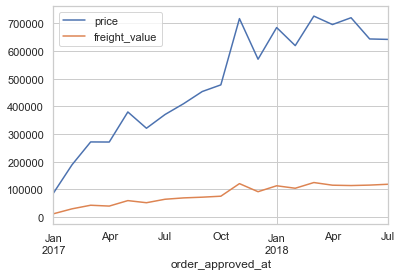

In [10]:
print('Gráfico com a evolução de valor total produto e valor total frete')

plt.figure(figsize=(10,10))
dfpred.plot()

In [11]:
#preparando base para regressão

dfreg = dfamostra[['order_approved_at','price','freight_value']]
dfreg['order_approved_at'] =  pd.to_datetime(dfreg['order_approved_at']).dt.to_period('m')
dfreg = dfpred.groupby('order_approved_at', as_index=False).sum()
dfreg

<ipython-input-11-fa435f2d4b4e>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfreg['order_approved_at'] =  pd.to_datetime(dfreg['order_approved_at']).dt.to_period('m')


,price,freight_value
0,86617.84,11823.29
1,188827.97,29675.03
2,271206.55,42633.53
3,270871.37,39596.83
4,379463.35,59360.30
5,320631.83,51713.95
6,370281.02,64247.12
7,409435.64,69146.54
8,453257.96,71729.87
9,477281.33,75264.53


In [12]:
reg = LinearRegression()

#set data
x = dfreg.index.values.reshape(-1, 1)
y = dfreg['price'].values

#treinar modelo
reg.fit(x,y)

LinearRegression()

In [13]:
reg.coef_

array([32916.63940351])

In [14]:
reg.intercept_

190200.3969473646

<AxesSubplot:>

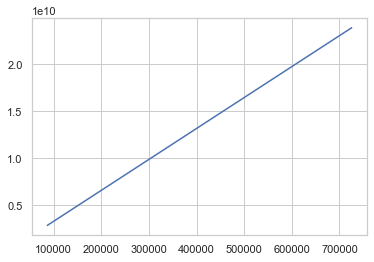

In [15]:
xr = np.array(dfpred['price'])
yr = reg.intercept_ + xr*reg.coef_

sns.lineplot(x= xr, y= yr)

In [16]:
reg.predict([[10]])

array([519366.79098247])

In [17]:
dfamostra['price'].describe()

count    76680.000000
mean       120.534075
std        182.854385
min          0.850000
25%         39.900000
50%         74.990000
75%        134.990000
max       6735.000000
Name: price, dtype: float64

<AxesSubplot:>

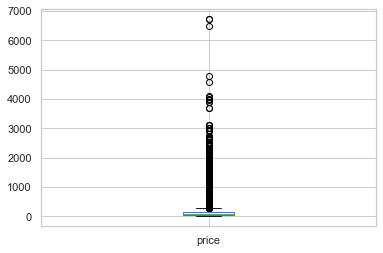

In [18]:
dfamostra['price'].plot.box()